# Modellwahlverfahren für gesamten Datensatz der Autoren

### Laden der Daten

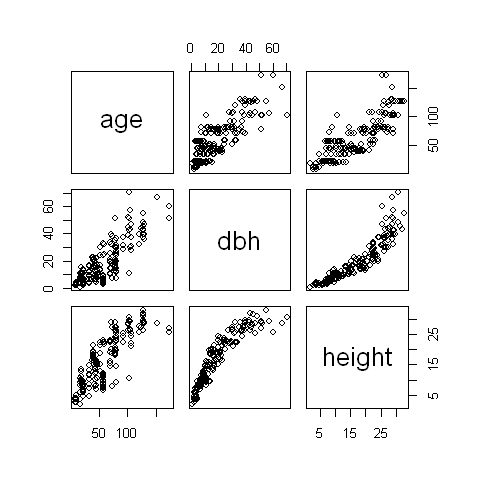

In [4]:
beech.data <- read.csv("buche.csv")
### visualisation of the correlation of the influencing factors
options(repr.plot.width = 4, repr.plot.height = 4)
plot(beech.data[3:5])

In [5]:
head(beech.data)

author,hsl,age,dbh,height,biom
Bartelink,23,20,8.4,9.80,22.7
Bartelink,23,20,9.9,11.25,29.2
Bartelink,23,20,10.7,9.70,38.7
Bartelink,23,21,10.6,9.75,31.3
Bartelink,23,21,10.7,9.30,32.0
Bartelink,23,21,7.0,8.40,11.3


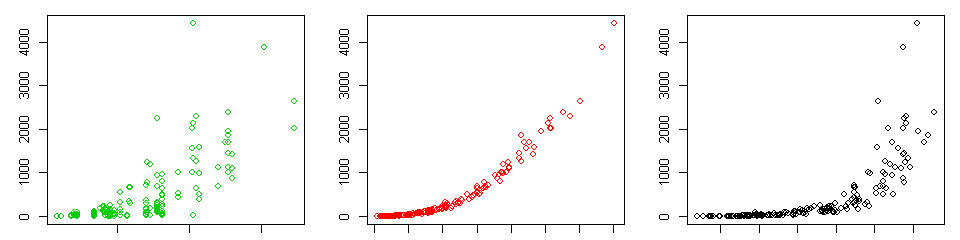

In [2]:
### visualize the relevant dependencies of the biomass and the influencing factors 
### age is green; dbh(durchmesserBrusthöhe) is red; height is black

options(repr.plot.width = 8, repr.plot.height = 2)
par(mfrow=c(1,3), mar=c(1,3,1,1))
plot(biom~age, data=beech.data,xlab="age", ylab="biomass",col=3)
plot(biom~dbh, data=beech.data,xlab="dbh", ylab="biomass",col=2)
plot(biom~height, data=beech.data,xlab="height", ylab="biomass")

<br>
<br>
<font size="4">Erstellung von Modellen für genau eine Einflussgröße um die Abhängigkeit zu analysieren:</font>
<br>
<br>

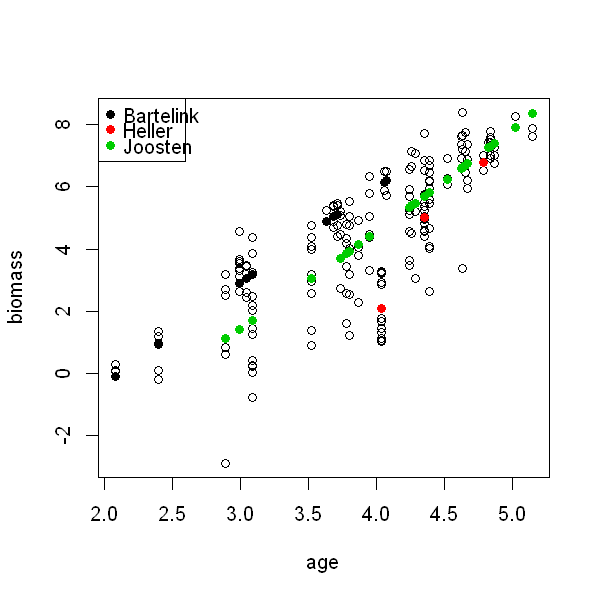

In [3]:
### dependency of the biomass in relation to the age of the beech

options(repr.plot.width = 5, repr.plot.height = 5)
plot(log(beech.data$age), log(beech.data$biom), xlab="age", ylab="biomass")
Mage1=lm(log(biom) ~ (1 + log(age))*as.factor(author), data = beech.data)
Mage2=lm(log(biom) ~ (1 + log(age) + I(log(age)^2))*as.factor(author), data = beech.data)
Mage3=lm(log(biom) ~ (1 + log(age) + I(log(age)^2)+ I(log(age)^3))*as.factor(author), data = beech.data)

X=model.matrix(Mage2) 
coef_vector <- as.numeric(unlist(coef(Mage2)))

y =X %*% coef_vector
#visualise the model with differet color for each author
points(log(beech.data$age), y, col=beech.data$author, pch=16)
legend("topleft", legend=unique(beech.data$author), col=unique(beech.data$author), pch=16)

In [4]:
summary(Mage2)


Call:
lm(formula = log(biom) ~ (1 + log(age) + I(log(age)^2)) * as.factor(author), 
    data = beech.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0114 -0.5122  0.0668  0.6559  3.1536 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)                              -7.5665     4.8652  -1.555   0.1217  
log(age)                                  3.8038     3.2178   1.182   0.2388  
I(log(age)^2)                            -0.1046     0.5178  -0.202   0.8401  
as.factor(author)Heller                -153.7685    69.4355  -2.215   0.0281 *
as.factor(author)Joosten                  0.7879     6.4553   0.122   0.9030  
log(age):as.factor(author)Heller         65.4191    32.1724   2.033   0.0436 *
log(age):as.factor(author)Joosten        -1.3439     3.8909  -0.345   0.7302  
I(log(age)^2):as.factor(author)Heller    -7.0199     3.7256  -1.884   0.0612 .
I(log(age)^2):as.factor(author)Joosten    0.1973     0.5873   0.336   0.

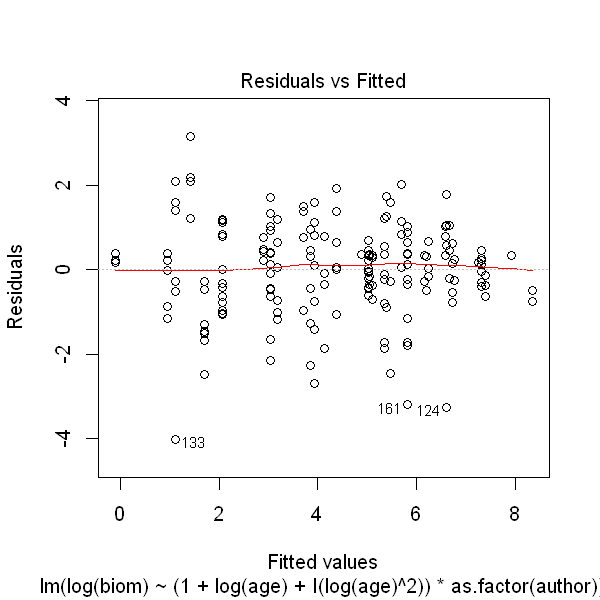

In [5]:
plot(Mage2,which=1)

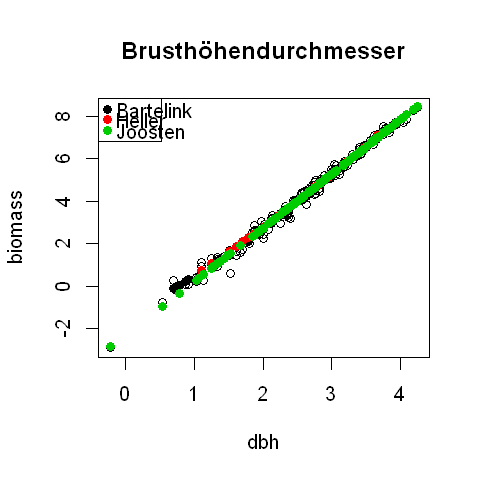

In [3]:
plot(log(beech.data$dbh), log(beech.data$biom), main="Brusthöhendurchmesser", xlab="dbh", ylab="biomass")
Mdbh1=lm(log(biom) ~ (1 + I(log(dbh)) +  I(log(dbh))) * as.factor(author) , data = beech.data)
Mdbh2=lm(log(biom) ~ (1 + I(log(dbh)) + I(log(dbh)^2)) * as.factor(author) , data = beech.data)
Mdbh3=lm(log(biom) ~ (1 + I(log(dbh)) + I(log(dbh)^2) + I(log(dbh)^3)) * as.factor(author) , data = beech.data)
Mdbh4=lm(sqrt(biom) ~ (1 + I(sqrt(dbh)) + I(sqrt(dbh)^2))* as.factor(author) , data = beech.data)


X=model.matrix(Mdbh2)
coef_vector <- as.numeric(unlist(coef(Mdbh2)))

y =X %*% coef_vector
points(log(beech.data$dbh), y, col=beech.data$author, pch=16)
legend("topleft", legend=unique(beech.data$author), col=unique(beech.data$author), pch=16)

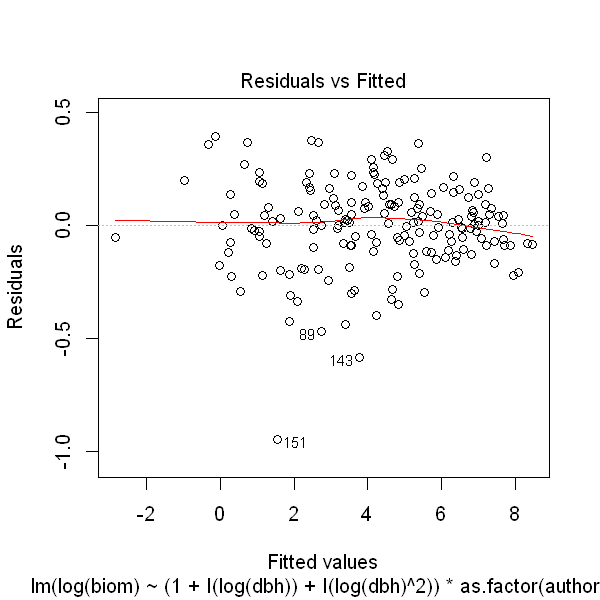

In [7]:
plot(Mdbh2,which=1)

In [18]:
summary(Mdbh2)


Call:
lm(formula = log(biom) ~ (1 + I(log(dbh)) + I(log(dbh)^2)) * 
    as.factor(author), data = beech.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94689 -0.08928  0.01204  0.12373  0.39307 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            -1.32595    0.20310  -6.529 7.18e-10 ***
I(log(dbh))                             1.60158    0.21430   7.474 3.78e-12 ***
I(log(dbh)^2)                           0.19310    0.05131   3.763 0.000230 ***
as.factor(author)Heller                -0.15548    0.43318  -0.359 0.720089    
as.factor(author)Joosten               -0.96890    0.23090  -4.196 4.34e-05 ***
I(log(dbh)):as.factor(author)Heller     0.29298    0.41373   0.708 0.479815    
I(log(dbh)):as.factor(author)Joosten    0.89955    0.23239   3.871 0.000154 ***
I(log(dbh)^2):as.factor(author)Heller  -0.07505    0.09171  -0.818 0.414338    
I(log(dbh)^2):as.factor(author)Joosten -0.18529   

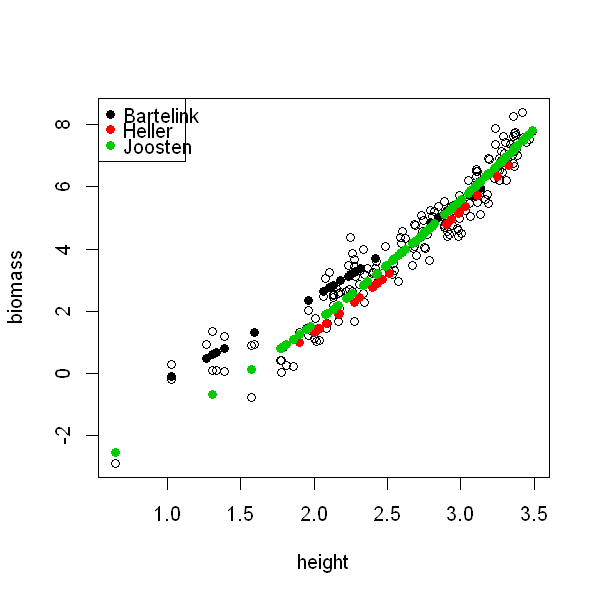

In [16]:
plot(log(beech.data$height), log(beech.data$biom), xlab="height", ylab="biomass")
Mheight1=lm(log(biom) ~ (1 + I(log(height)))*as.factor(author) , data = beech.data)
Mheight2=lm(log(biom) ~ (1 + I(log(height))+ I(log(height)^2))* as.factor(author), data = beech.data)
Mheight3=lm(log(biom) ~ (1 + I(log(height))+ I(log(height)^2)+ I(log(height)^3))* as.factor(author), data = beech.data)

X=model.matrix(Mheight2) 
coef_vector <- as.numeric(unlist(coef(Mheight2)))

y =X %*% coef_vector
points(log(beech.data$height), y, col=beech.data$author, pch=16)
legend("topleft", legend=unique(beech.data$author), col=unique(beech.data$author), pch=16)

In [17]:
summary(Mheight2)


Call:
lm(formula = log(biom) ~ (1 + I(log(height)) + I(log(height)^2)) * 
    as.factor(author), data = beech.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09926 -0.34022 -0.03551  0.40235  1.28632 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                                -2.3130     0.9374  -2.467   0.0146
I(log(height))                              1.9206     0.9292   2.067   0.0402
I(log(height)^2)                            0.2306     0.2150   1.073   0.2849
as.factor(author)Heller                    -1.4891     4.4613  -0.334   0.7390
as.factor(author)Joosten                   -1.6955     1.1691  -1.450   0.1488
I(log(height)):as.factor(author)Heller     -0.2647     3.5892  -0.074   0.9413
I(log(height)):as.factor(author)Joosten     0.1028     1.0885   0.094   0.9249
I(log(height)^2):as.factor(author)Heller    0.2215     0.7053   0.314   0.7539
I(log(height)^2):as.factor(author)Joosten   0.1598   

<br>
<br>
<font size="3">Erstellen von Modellen, die alle (relevanten) Einflussgrößen einbeziehen und aus der vorherigen Analyse als sinnvoll erachtet wurden:</font>
<br>
<br>

In [19]:
M1=lm(log(biom) ~ (1 + I(log(age)) + log(dbh) + I(log(height))) * as.factor(author), data = beech.data)
M2=lm(log(biom) ~ (1 + I(log(age)) + I(log(age)^2) + log(dbh) + I(log(dbh)^2) + I(log(height)) + I(log(height)^2)) * as.factor(author) , data = beech.data)
M3=lm(log(biom) ~ (1 + I(log(age)) + I(log(age)^2) + log(dbh) + I(log(height)) + I(log(height)^2)) * as.factor(author), data = beech.data)
M4=lm(log(biom) ~ (1 + I(log(age)) + log(dbh) + I(log(height)) + log(dbh):log(age)+log(dbh):log(height)+log(height):log(age))* as.factor(author) , data = beech.data)
M5=lm(log(biom) ~ (1  + log(dbh)  + I(log(height)) + log(dbh):log(height))* as.factor(author) , data = beech.data)
M6=lm(log(biom) ~ (1 + I(log(age)) + I(log(age)^2)+ log(dbh) + I(log(dbh)^2) + I(log(height))+ I(log(height)^2) + log(age):log(height))*as.factor(author), data = beech.data)
M7=lm(log(biom) ~ 1 + I(log(age)) + log(dbh) + log(height) + as.factor(author) + as.factor(author):log(dbh), data = beech.data)
M8=lm(log(biom) ~ 1 + I(log(age)) + log(dbh) + I(log(height)) ,data = beech.data)
M9=lm(log(biom) ~ 1  + log(dbh)  + I(log(height)) + log(dbh):log(height) + as.factor(author) + as.factor(author):log(dbh), data = beech.data)


M1=lm(log(biom) ~ (1 + I(log(age)) + log(dbh) + I(log(height))) * as.factor(author)<br>
M2=lm(log(biom) ~ (1 + I(log(age)) + I(log(age)^2) + log(dbh) + I(log(dbh)^2) + I(log(height)) + I(log(height)^2)) * as.factor(author)<br>
M3=lm(log(biom) ~ (1 + I(log(age)) + I(log(age)^2) + log(dbh) + I(log(height)) + I(log(height)^2)) * as.factor(author)<br>
M4=lm(log(biom) ~ (1 + I(log(age)) + log(dbh) + I(log(height)) + log(dbh):log(age)+log(dbh):log(height)+log(height):log(age))* as.factor(author)<br>
M5=lm(log(biom) ~ (1  + log(dbh)  + I(log(height)) + log(dbh):log(height))* as.factor(author)<br>
M6=lm(log(biom) ~ (1 + I(log(age)) + I(log(age)^2)+ log(dbh) + I(log(dbh)^2) + I(log(height))+ I(log(height)^2) + log(age):log(height))*as.factor(author)<br>
M7=lm(log(biom) ~ 1 + I(log(age)) + log(dbh) + log(height) + as.factor(author) + as.factor(author):log(dbh)<br>
M8=lm(log(biom) ~ 1 + I(log(age)) + log(dbh) + I(log(height))<br>
M9=lm(log(biom) ~ 1  + log(dbh)  + I(log(height)) + log(dbh):log(height) + as.factor(author) + as.factor(author):log(dbh)


<br>
<br>
<font size="3">Analyse der Modelle anhand des Medians der Residuals und des Residuen plots. <br> Für jeden Koeffizienten
die Auswertung im Vergleich zu allen anderen Modellen wie der Wert für Pr(>|t|) sich verhält </font>
<br>
<br>

In [23]:
summary(M5)


Call:
lm(formula = log(biom) ~ (1 + log(dbh) + I(log(height)) + log(dbh):log(height)) * 
    as.factor(author), data = beech.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49122 -0.09806  0.01747  0.08135  0.53569 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                   -1.11092    0.25280  -4.395
log(dbh)                                       1.49628    0.17334   8.632
I(log(height))                                -0.21399    0.20745  -1.032
as.factor(author)Heller                       -1.09440    0.81399  -1.344
as.factor(author)Joosten                      -1.69988    0.30245  -5.620
log(dbh):log(height)                           0.28581    0.05693   5.021
log(dbh):as.factor(author)Heller              -0.22784    0.41288  -0.552
log(dbh):as.factor(author)Joosten              0.45265    0.20229   2.238
I(log(height)):as.factor(author)Heller         0.81804    0.45379   1.803
I(log(hei

In [20]:
kreuzvalidierung <- function(model_list, data) {
    
    n=dim(data)[1]
    groups=floor(min(10,sqrt(n)))
    amount_model=length(model_list)
    r=dim(data)[1]
    
    index <- rep(1:groups, length.out=r)
    index <- sample(index)

    SEP_list=numeric(amount_model)


    for (i in 1:groups)
    {
      ### Zerlegung
        data.test <- data[index==i,]
        data.train <- data[index!=i,]

      ### Parameterschätzung
        for (m in 1:amount_model){
            suppressWarnings({
            updated_model <- update(model_list[[m]], data = data.train)
            SEP_list[m] <- SEP_list[m] + sum( ( log(data.test$biom) - predict(updated_model,newdata=data.test) )^2 )
            })
            
        }
    }

    return (SEP_list)
    }

In [21]:
### creation of a list with all models
model_list=list()
model_list[[1]] <- M1
model_list[[2]] <- M2
model_list[[3]] <- M3
model_list[[4]] <- M4
model_list[[5]] <- M5
model_list[[6]] <- M6
model_list[[7]] <- M7
model_list[[8]] <- M8
model_list[[9]] <- M9

In [22]:
### running of the crossvalidation and printing of the results
set.seed(1)
SEP_list=kreuzvalidierung(model_list,beech.data) 
print(SEP_list)

[1] 6.960618 6.638962 6.496953 6.467919 5.894307 6.425569 6.604511 7.694626
[9] 6.177435


In [5]:
d=pd.DataFrame()

ERROR: Error in pd.DataFrame(): konnte Funktion "pd.DataFrame" nicht finden
